# **Setting up GPU**

*   Go to **Edit** -> **Notebook Settings** -> **Hardware Accelerator**
*   Select GPU



# **Keras**


*   A deep learning framework that offers simple **APIs to implement and train common neural network architectures**.
*   Integrated with low-level deep learning library, tensorflow.
*   Provides flexibility to define models using both keras and tensorflow simultaneously.
*   Read more: https://keras.io/why-use-keras/


# **Load Dataset**

*   We will work with **MNIST and Fashion-MNIST**  datasets
*   Keras includes some common datasets (all three are there)

**MNIST**
*   Database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples
*   Each digit is represented 28 x 28 pixel values
*   Digit has to be classified as one of the 0-9 (Total 10 classes)




<module 'keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/datasets/mnist/__init__.py'>
<class 'numpy.ndarray'>
Train Image Shape:  (60000, 28, 28) Train Label Shape:  (60000,)
<class 'numpy.ndarray'>
Test Image Shape:  (10000, 28, 28) Test Label Shape:  (10000,)
[5 0 4 ... 5 6 8]
Visualizing a random image (11th) from training dataset


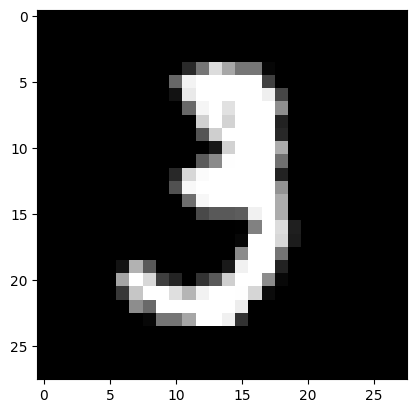

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical


print(mnist)

#Load MNISt dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print (type(train_images))

# Check number of samples (60000 in training and 10000 in test)
# Each image has 28 x 28 pixels
print("Train Image Shape: ", train_images.shape, "Train Label Shape: ", train_labels.shape)
print(type(train_images))
print("Test Image Shape: ", test_images.shape, "Test Label Shape: ", test_labels.shape)

print(train_labels)
#  Visualizing a random image (11th) from training dataset
print("Visualizing a random image (11th) from training dataset")
_ = plt.imshow(train_images[10], cmap='gray')


5


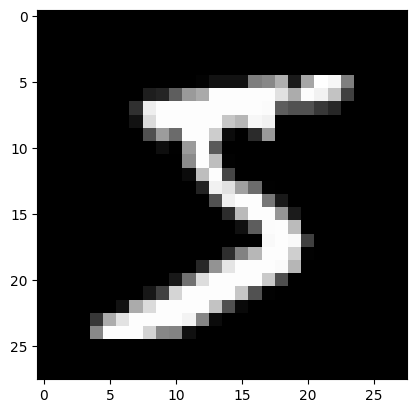

------------------------------------------------------------
0


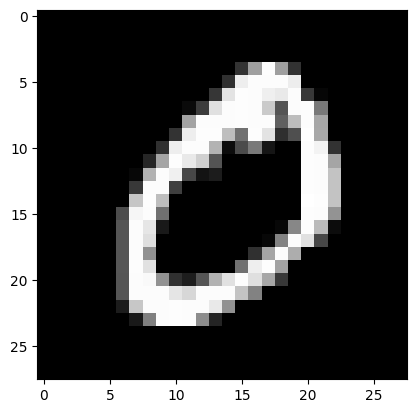

------------------------------------------------------------
4


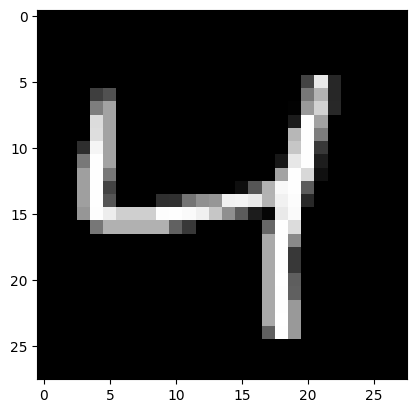

------------------------------------------------------------
1


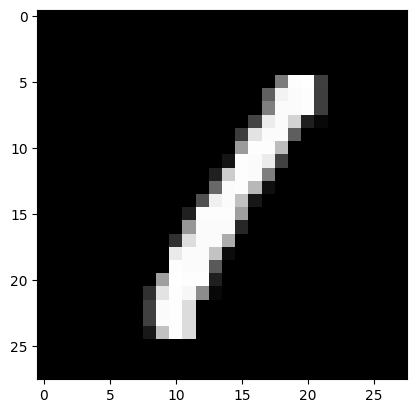

------------------------------------------------------------
9


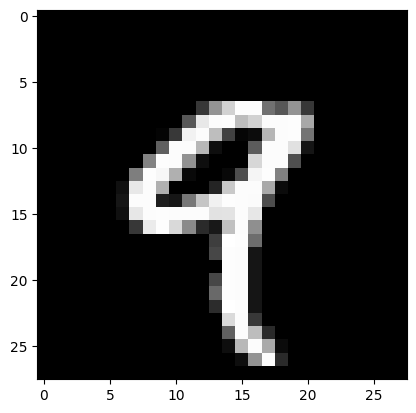

------------------------------------------------------------


In [2]:
for i in range(5):
  print(train_labels[i])
  plt.imshow(train_images[i],cmap='gray')
  plt.show()
  print("--"*30)

In [3]:
# Preprocessing: Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# **Define Neural Network Model**

To define simple models, we will use

*   **Sequential Model** which is  simply linear stack of layers
*   **Layers** include Linear layer (**Dense**), Convolutional Layers (**Conv1D, Conv2D etc.**), recurrent layers (**RNN, LSTM**), dropout etc.


In more complicated scenarios (e.g. Multi-output model, models with shared parameters etc.), we will use **Functional APIs**.
*    This will be used in later part of tutorial, where we implement a multi-task learning system.



# **Feed-Forward Neural Network**

*   For a simple feed-forward neural network, only use stack of **Dense** and **Dropout** Layers

*   **Dense** implements the operation: $output=activation(W^Tx + b)$

*   **Dropout** is the most commonly (**almost 100%**) used mechanism to avoid overfitting in a neural network. It randomly set a fraction (rate) of input units to **zero** during training.

*    Regularization techniques such as $l_1$ and $l_2$ norms are too expensive when training a big neural network with millions of parameters (**extremely SLOW**).

*    Use **Dropout without an exception**. You will see that the first model we define next has over 900K parameters that will be trained using just 60,000 samples. When using such **overparametrization**, model can easily remember labels for each training sample but fail to generalize to test samples.
*    It is a good practice to validate your model's architecture by using $model.summary()$


In [4]:
import math
import pandas as pd
import keras
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout

In [6]:
model = Sequential([Dense(64, input_shape=(784,), activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# class MyModel(Model):
#     def __init__(self):
#         super().__init__()
#         self.inp = Dense(64, input_shape=(784,), activation="relu")
#         self.hidden = Dense(32, activation="relu")
#         self.out = Dense(10, activation="softmax")

#     def call(self, inputs):
#         x = self.inp(inputs)
#         x = self.hidden(x)
#         out = self.out(x)
#         return out

# model = MyModel()

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" alt="drawing" width="500"/>


# **Three basic thinngs that training a neural network requires:**

- A loss criterion
- Optimizer
- Metrics

In [8]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# print("Train image shape: ", train_images.shape)
# print(train_labels.shape)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_images.reshape((-1, 28*28))
print(flatten_train_images)
flatten_test_images = test_images.reshape((-1, 28*28))

print("Train image shape: ", train_images.shape, "Flattened image shape: ", flatten_train_images.shape)
print(train_labels.shape)


print(type(flatten_train_images[0,0]))
print(type(train_labels[0]))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Train image shape:  (60000, 28, 28) Flattened image shape:  (60000, 784)
(60000,)
<class 'numpy.float64'>
<class 'numpy.uint8'>


In [9]:
# Train model
model.fit(flatten_train_images, to_categorical(train_labels), epochs=10, batch_size=256,)

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 1.9547 - accuracy: 0.4063
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 1.0264 - accuracy: 0.7697
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6329 - accuracy: 0.8443
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.4970 - accuracy: 0.8718
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.4298 - accuracy: 0.8851
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.3898 - accuracy: 0.8927
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3632 - accuracy: 0.8994
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3437 - accuracy: 0.9033
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.9072
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9110

# **Evaluation**

*   Evaluate the model on test images using `model.evaluate()`, pass test images and labels as arguments.



In [10]:
# Evaluate your model's performance on the test data
performance = model.evaluate(flatten_test_images, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.9166
Accuracy on Test samples: 0.9165999889373779


# **Convolutional Neural Network**

*   For large input (like image of size 1024*1024), fully connected NN requires a lot of parameters
*   Input can also have local structures
*   Use convolutional operation
*   Define a convolutional layer using $Conv2D$ that creates a 2d convloutional layers, specify arguments such as the size of filters (32), kernel (3), activation (relu) etc.

**Note**: In this part of code, we separate the feature layers from classifier layer to accomodate the later part of tutorial on **Fine-tuning**. An equivalent implementation for
```
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)
```

**is ==>**

```
cnn_model = Sequential([Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Flatten(),Dense(32, activation='relu'), Dense(10, activation='softmax'),])
```

> **Compile, train, test the model and compare**


1.   Number of Parameters (almost half the size of fully connected NN)
2.   Performance (significantly better than fully connected NN, due to the capability of CNN to model local receptive field)

### Interpretability:
It's generally hard to quantify what a deep convolutional net sees or learns aka the name 'black-box'. But there have been extensive analysis regarding visualizing convolutional features. Here are some interesting blogs covering the interpretability aspect of convolutional nets:
- https://distill.pub/2017/feature-visualization/
- https://distill.pub/2020/circuits/visualizing-weights/
- https://christophm.github.io/interpretable-ml-book/cnn-features.html


In [11]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(32, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_images.reshape(60000,28,28,1)
test_images_3d = test_images.reshape(10000,28,28,1)

cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3d, to_categorical(test_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 32)               

# Training Time


*   Previous results suggest using deeper models will increase the training time.
*   In general, assuming that we've got enough power for parallel computation, traning deeper networks takes longer compared to wider networks. This is possible thanks to the possibility of doing each layer's calcualtions in parallel. In other words, in a deep model, we cannot do the computaion of different layers simultaneously.





# Effective receptive field of convolutional filters


*   Stacking two 3\*3 conv layers = A single 5\*5 filter
*   Stacking three 3\*3 conv layers = A single 7\*7 filter

Note the change in the number of parameters:

*   2 * (3\*3) = 18 vs. 5\*5 = 25
*   3 * (3\*3) = 27 vs. 7\*7 = 49

Illustration [here](https://www.baeldung.com/cs/cnn-receptive-field-size).







# Transfer Learning (CNN Layers) and fine-tuning

*   The Feature Layers (convolutional layers) learn some low-level patterns that can be effectively used for many (most) other tasks
*   These low level features are transferable
*   We use the **feature layers** from the pretrained model on MNIST dataset and disable parameter update for them
*   **Fine-tune classification layers** in the model on a new **Fashion MNIST** dataset

**Fashion MNIST**
*   Database of fashion categories, has a training set of 60,000 examples, and a test set of 10,000 examples
*   Each image is represented 28 x 28 pixel values
*   Digit has to be classified as one of the 10 types

**Categories:**

0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle Boot

(60000, 28, 28)
Visualize a sample
2


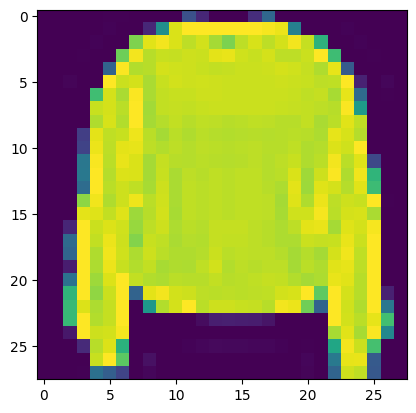

In [12]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()
print(train_fashion_images.shape)

train_fashion_images = (train_fashion_images / 255)
test_fashion_images = (test_fashion_images / 255)
print("Visualize a sample")
print(train_fashion_labels[7])
_ = plt.imshow(train_fashion_images[7])




---


*   **Freeze the Feature Layers** by disabling "trainable" attribute

```
for l in common_features:
  l.trainable = False
```

*    Check number of trainable parameters in model's summary
*    Feature Layers (Convolutional) are non-trainable

```
Total params: 70,378
Trainable params: 51,562
Non-trainable params: 18,816
```


In [13]:
train_fashion_images_3d = train_fashion_images.reshape(60000,28,28,1)
test_fashion_images_3d = test_fashion_images.reshape(10000,28,28,1)

print(cnn_model.summary())

for l in common_features:
  l.trainable = False

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 32)               

In [21]:
# Compile the model


# Fit the model on only 1 epoch with 256 batch-size


# Evaluate performance on test set


# print("Accuracy on Test samples: {0}".format(performance[1]))



---


**Compare Transferred Model against the Model trained from scratch**

*   The performance is roughly 15-30% lower (depends on network initialization)



In [22]:
# Fill the CNN model in features and the Dense Classifier
features = []
classifier = []

# new_model = Sequential(features+classifier)
# print(new_model.summary())

# new_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# new_model.fit(train_fashion_images_3d, to_categorical(train_fashion_labels), epochs=1, batch_size=256,)
# performance = new_model.evaluate(test_fashion_images_3d, to_categorical(test_fashion_labels))

# print("Accuracy on Test samples: {0}".format(performance[1]))

# Multi-Task Learning


*   We observed feature layers are transferable across classification tasks (Transfer Learning)
*   Learned Fetaure layers can **generalize better** if we learn them **over multiple tasks and datasets** (Multi-task Learning)
*   In this part of tutorial, we will use **functions APIs** that provide greater flexibility to define complex models (e.g. two models on two different tasks with shared parameters)
*    Key Idea:
> Successively call Layers over the Input to get the Output
```
y = Layer_Output(Layer_Hidden(Layer_Input(x)))
```
> Use input and output to define Model
```
model = Model(inputs=train_X, outputs=train_y)
```

*    We can **reuse** these trained layers in any new model by calling them on new input tensors
*    Training this model for 2 epochs gives superior performance against the individual models trained for 5-10 epochs
*    Model can quickly learn better generalizable features, if the objective tasks are related

In [16]:
from keras.models import Model
from keras.layers import Input

# Define a fetaure extraction model that is shared for both mnist and fashion-mnist tasks
Base_feature_model = Sequential([Conv2D(32, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Flatten(), Dense(32, activation='relu'),])

Classifier_mnist = Sequential([Dense(10, activation='softmax')])
Classifier_fashion_mnist = Sequential([Dense(10, activation='softmax')])

# Instantiate a Tensor to feed Input (Input Layer)
mnist_input = Input(shape=(28,28,1))
fashion_mnist_input = Input(shape=(28,28,1))

# Call Base_feature_model over the mnist images
mnist_features = Base_feature_model(mnist_input)

# Call Base_feature_model over the fashion-mnist images
fashion_mnist_features = Base_feature_model(fashion_mnist_input)

# Call mnist_prediction layer over the mnist images
# mnist_prediction represents the predicted output for mnist dataset
mnist_prediction = Classifier_mnist(mnist_features)

# Call fashion_mnist_prediction layer over the mnist images
# fashion_mnist_prediction represents the predicted output for fashion-mnist dataset
fashion_mnist_prediction = Classifier_fashion_mnist(fashion_mnist_features)

# define model by calling Model(inputs, outputs) on the instance of input layers and output layers
joint_model = Model(inputs=[mnist_input, fashion_mnist_input],
                    outputs=[mnist_prediction, fashion_mnist_prediction])

print(joint_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, 32)                   70048     ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 sequential_4 (Sequential)   (None, 10)                   330       ['sequential_3[0][0]']    

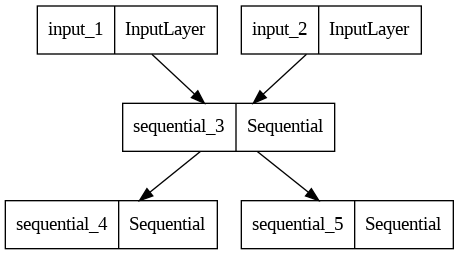

In [17]:
# Graphical structure of the model using keras utils
keras.utils.plot_model(joint_model)

In [18]:
joint_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'],)  # Using adam optimizer for faster convergence

joint_model.fit([train_images_3d, train_fashion_images_3d],
                [to_categorical(train_labels), to_categorical(train_fashion_labels)],
                epochs=1, batch_size=1024,)
performance = joint_model.evaluate([test_images_3d, test_fashion_images_3d],
                                   [to_categorical(test_labels),
                                    to_categorical(test_fashion_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFashion MNIST Accuracy: {1}".format(performance[3], performance[4]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3734 - sequential_4_loss: 0.1512 - sequential_5_loss: 0.2223 - sequential_4_accuracy: 0.8135 - sequential_5_accuracy: 0.5540
===
MNIST Accuracy: 0.8134999871253967
Fashion MNIST Accuracy: 0.5540000200271606


# **Hyperparameter Tuning**

*    We find Parameters of a Neural Network using some optimzation technique
*    Hyperparmeters are obtained through search
*    Generally, we use **grid search** to find optimal hyperparameters (**Brute-Force Approach**)
*    **TPE** (Tree Stuctured Parzen Estimator) is another popular approach (based on Gaussian Processes) to estimate hyperparameters
*    Here, we use **Hyperopt** library that provides an easy to use TPE based hyperparameter optimization algorithm



In [19]:
!pip install hyperopt

# Steps to use hyperopt

*   Define hyperparameter search space
```
space = {'conv_kernel_size': hp.choice('conv_kernel_size', [3, 5]),
'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}
```
Here we search among 2 values (3,5) for kernel size of convolutional layers, 2 possible values (SGD, Adam) for optimizers, and the dropout rate of a float number between 0.1 and 0.35 sampled uniformly.

*   Define the **objective function** to optimize
1.    It takes hyperparamers as argument
2.    Define, Compile and Train model, calculate loss/ accuracy on evaluation dataset
3.    Return a dictionary object with keys "**loss**" (float-valued function that we want to minimize) and "**status**" (keys from hyperopt.STATUS_STRINGS, such as 'ok' for successful completion, and 'fail' in cases where the function turned out to be undefined)
4.   You can also return the model object and later use that for evaluation on test-data


*   Specify **search algorithm (TPE)** to use
```
algo=tpe.suggest
```

*   Maximum number of hyperparameters to try
```
max_evals=25
```

*   **Optional**: create and pass **trials** object as an argument. With trials object, we can inspect all of the return values that are calculated during the experiment (e.g. losses, statuses, model)

*   For more details: check https://github.com/hyperopt/hyperopt/wiki/FMin


In [20]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from keras.layers import Dropout


def optimize_cnn(hyperparameter):
  # Define model using hyperparameters
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(hyperparameter['dropout_prob']),
            Flatten(),
            Dense(32, activation='relu'),
            Dense(10, activation='softmax'),])

  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])

  cnn_model.fit(train_X, to_categorical(train_y), epochs=2, batch_size=256, verbose=0)
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(valid_X, to_categorical(valid_y), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})

train_X, train_y = train_fashion_images_3d[:50000], train_fashion_labels[:50000]
valid_X, valid_y = train_fashion_images_3d[-10000:], train_fashion_labels[-10000:]

# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=10,
    )

print("==================================")
print("Best Hyperparameters", best)

test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_fashion_images_3d, to_categorical(test_fashion_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.31710527641501984, 'optimizer': 'sgd'}
Accuracy: 
0.6140999794006348
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.21639927821789579, 'optimizer': 'sgd'}
Accuracy: 
0.6297000050544739
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.19834585231560892, 'optimizer': 'sgd'}
Accuracy: 
0.6377999782562256
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.30890243410469476, 'optimizer': 'Adam'}
Accuracy: 
0.8424000144004822
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.3380082037465756, 'optimizer': 'sgd'}
Accuracy: 
0.6703000068664551
----------------------------------------------------
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.1517175402819222, 'optimizer':